In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import phyre
import torch
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

In [2]:
tier = 'ball'
eval_setup = 'ball_within_template'
fold_id = 0
random.seed(0)

### 1. Initialize the  Simulation Cache

In [3]:
train, dev, test = phyre.get_fold(eval_setup, fold_id)
print('Size of resulting splits:\n train:', len(train), '\n dev:',
      len(dev), '\n test:', len(test))

Size of resulting splits:
 train: 1600 
 dev: 400 
 test: 500


In [4]:
cache = phyre.get_default_100k_cache(tier)
print('cache.action_array shape:', cache.action_array.shape)

cache.action_array shape: (100000, 3)


### 2. Initialize the DQN Agent

In [5]:
from dqn import DQNAgent

DEBUG:root:test


In [6]:
agent = DQNAgent()

### Load Model

In [7]:
#model = agent.build_model()
#new_model = TestModel()
#model.load_state_dict(torch.load("./model/test_model.pth"))
#state = dict(model =model, cache = cache)

### 3. Train the Agent

In [ ]:
state, statistic = agent.train(cache, train, tier, test)

INFO:root:Preprocess the training data
INFO:root:Train set: size=117005756, solved_ratio=1.71%
INFO:root:Create evaluation data from train & dev
INFO:root:Start initializing the Model
INFO:root:Start Training the Model
/home/mynsng/anaconda3/envs/phyre/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [14]:
import pickle

In [17]:
file=open("./model/statistic","wb") 
pickle.dump(statistic,file) 
file.close()

In [18]:
file=open("./model/statistic","rb") 
content=pickle.load(file) 
content


{'max_loss': [0.22566303610801697,
  0.33785611391067505,
  0.3251999616622925,
  0.2762452960014343,
  0.2595049738883972,
  0.24220727384090424,
  0.26737651228904724,
  0.2224251627922058,
  0.16893251240253448,
  0.20253822207450867,
  0.23607254028320312,
  0.16420316696166992,
  0.13396820425987244,
  0.19362539052963257,
  0.1522386223077774,
  0.1756264567375183,
  0.14412248134613037,
  0.1509857028722763,
  0.21920999884605408],
 'min_loss': [0.08454235643148422,
  0.07449795305728912,
  0.04295249283313751,
  0.02174980379641056,
  0.04839456453919411,
  0.037746086716651917,
  0.04054053872823715,
  0.05455659702420235,
  0.05192498862743378,
  0.034379079937934875,
  0.037249140441417694,
  0.05573035404086113,
  0.03413664922118187,
  0.028800349682569504,
  0.028857296332716942,
  0.04206705838441849,
  0.026426365599036217,
  0.03180651366710663,
  0.051828622817993164],
 'loss_var': [0.0015211425488814712,
  0.004742411896586418,
  0.005595352966338396,
  0.00389746413

In [19]:
content['max_loss']

[0.22566303610801697,
 0.33785611391067505,
 0.3251999616622925,
 0.2762452960014343,
 0.2595049738883972,
 0.24220727384090424,
 0.26737651228904724,
 0.2224251627922058,
 0.16893251240253448,
 0.20253822207450867,
 0.23607254028320312,
 0.16420316696166992,
 0.13396820425987244,
 0.19362539052963257,
 0.1522386223077774,
 0.1756264567375183,
 0.14412248134613037,
 0.1509857028722763,
 0.21920999884605408]

In [8]:
#num = -2:

max_loss = statistic['max_loss']
print(max_loss[-10:])
min_loss = statistic['min_loss']
print(min_loss[-10:])
mean_loss = statistic['mean_loss']
print(mean_loss[-10:])
max_loss_index= statistic['max_loss_index']
print(max_loss_index[-10:])
min_loss_index= statistic['min_loss_index']
print(min_loss_index[-10:]) 
max_loss_action = statistic['max_loss_action']
print(max_loss_action[-10:])
min_loss_action = statistic['min_loss_action']
print(min_loss_action[-10:])
loss_var = statistic['loss_var']
print(loss_var[-10:])

i=1
a = max_loss_index[-10:][i].item()
b = max_loss_action[-10:][i].cpu().numpy()

print(a, b)

[0.14848998188972473, 0.18018268048763275, 0.11242681741714478, 0.10856015980243683, 0.14997316896915436, 0.1194411963224411, 0.12812013924121857, 0.12325926125049591, 0.12009787559509277, 0.16466282308101654]
[0.028938516974449158, 0.03677867352962494, 0.036842212080955505, 0.022328238934278488, 0.028532125055789948, 0.029262635856866837, 0.047783225774765015, 0.02437187358736992, 0.03441291302442551, 0.03243743255734444]
[0.07792310416698456, 0.09102018177509308, 0.06940846890211105, 0.06691253185272217, 0.07227925956249237, 0.07414978742599487, 0.07966402918100357, 0.06250974535942078, 0.06604337692260742, 0.08179539442062378]
[tensor(228), tensor(211), tensor(1120), tensor(719), tensor(1560), tensor(92), tensor(243), tensor(116), tensor(857), tensor(304)]
[tensor(321), tensor(833), tensor(671), tensor(1231), tensor(17), tensor(15), tensor(221), tensor(664), tensor(1359), tensor(671)]
[tensor([0.6589, 0.7709, 0.8309], device='cuda:0'), tensor([0.0719, 0.3838, 0.4581], device='cuda:0

### Visualize

In [8]:
task_ids = [test[320]]
action = np.array([0.5 ,0.7 ,0.51880586])
images, predict_images = agent.predict_qa(state, task_ids, tier, action)

> /home/mynsng/phyre-graph/neural_model.py(262)predict_qa()
-> obs_predict = np.zeros((16, 256, 256), dtype = int)


(Pdb)  c


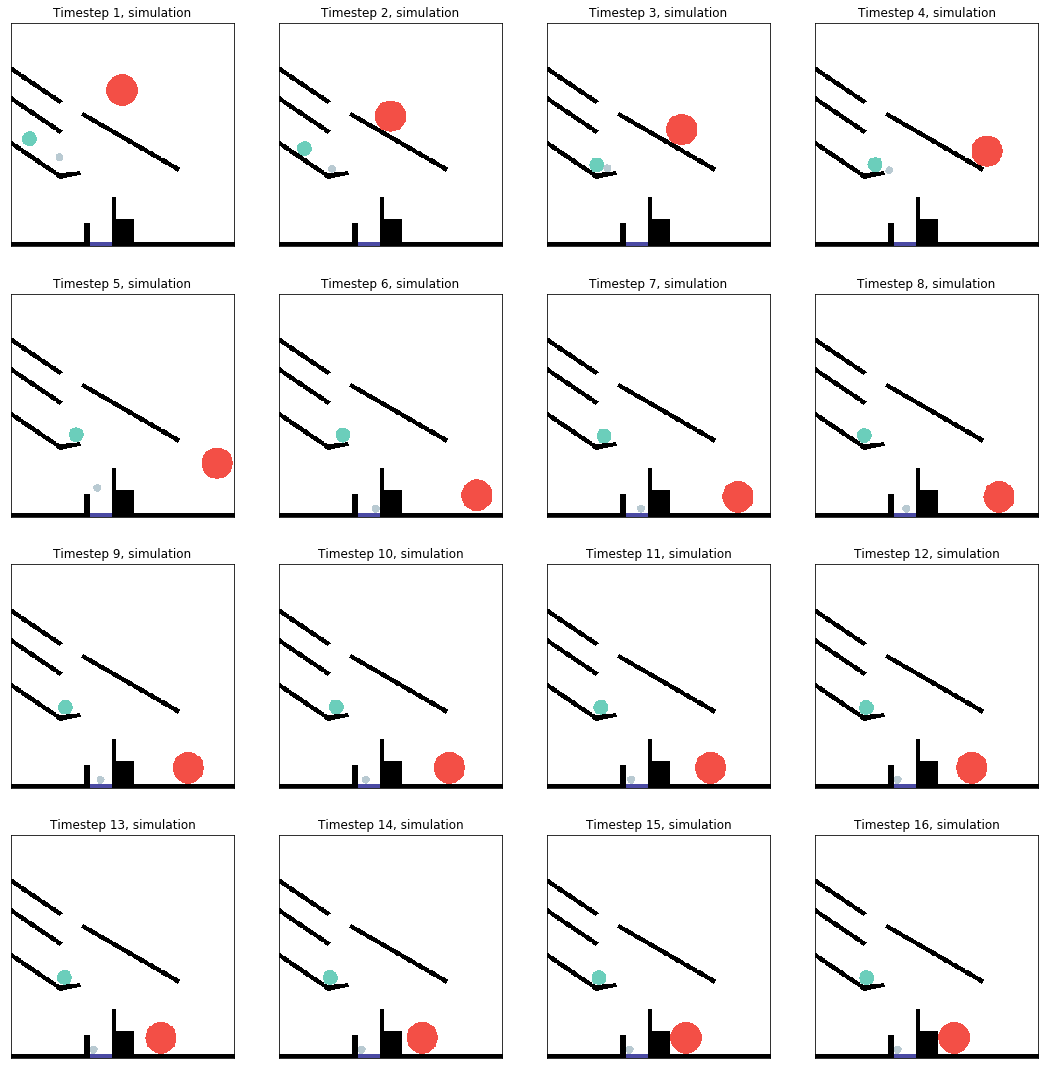

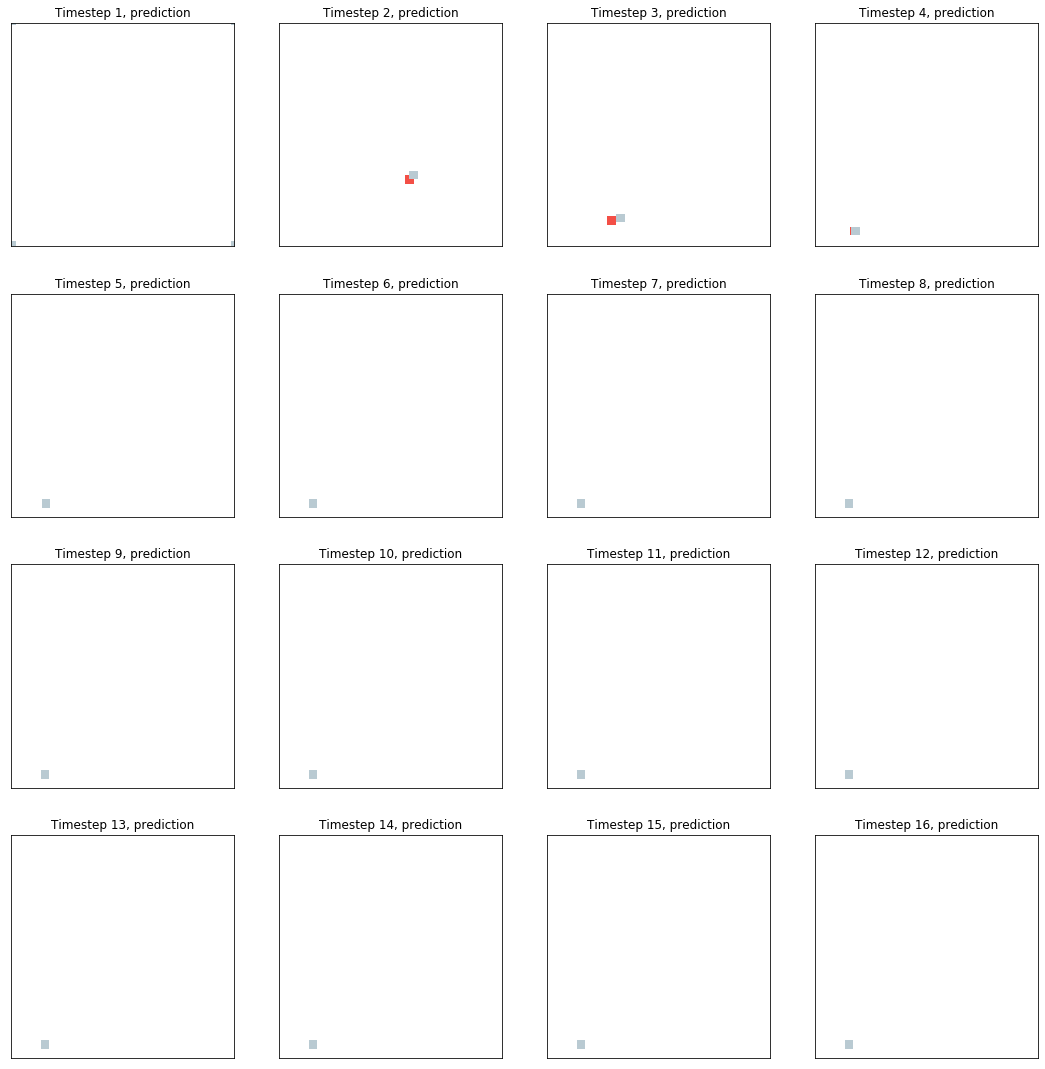

In [9]:
# plot할 개수 설정
fig1, axs1 = plt.subplots(4, 4, figsize=(15, 15))
fig1.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

fig2, axs2 = plt.subplots(4, 4, figsize=(15, 15))
fig2.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# plot 해보리기~~
for i, (ax, image) in enumerate(zip(axs1.flatten(), images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    
    ax.title.set_text(f'Timestep {i+1}, simulation')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
for i, (ax, image) in enumerate(zip(axs2.flatten(), predict_images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    
    ax.title.set_text(f'Timestep {i+1}, prediction')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

### 4. Evaluate the Agent

#### 4.1 Percentage of solved tasks per number of attempts

In [10]:
loss = agent.get_test_loss(state, test, tier)
print(loss)


0.006525427335873246


#### 4.2 AUCESS

In [15]:
model  = state['model']

# save
savePath = "./model/test_model_cross.pth"
torch.save(model.state_dict(), savePath)

# load
#new_model = TestModel()
#new_model.load_state_dict(torch.load("./output/test_model.pth"))